# Introduction

Hello, and to this EDA notebook! I hope you like baseball. If not, I hope that you do by the end of this journey, or at least that you can see how well-suited the sport is to some hardcore data analysis. I plan to use several high-level Python packages, including Matplotlib, NumPy, Scikit-learn, and Seaborn to construct a classifier that predicts the results (specifically, swing-and-miss rate) of several classes of pitches. Don't worry, I'll be sure to explain the nuances of the sport and the techniques that I'll be using as I go, so that hopefully by the time we're through you'll be able to understand just what makes certain pitches so filthy, and how data science can be used to better appreciate them. With that, let's get started!

<img src="https://www.mensjournal.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTk2MTM2MTE1NzAzODUwMTI5/mike-trout-main-21.jpg" alt="prettyfish">

*Here is a picture of the most beautiful man in the world. He does not know I exist.*

Let's consider a little game theory. In any plate appearance, a pitcher, stationed on the pitching mound, delivers the ball to home plate and attempts to retire the hitter that he is currently facing by any means available to him. He could throw a pitch that the batter hits to one of the many fielders that roam behind him, who will then attempt to record an out by either catching the ball on the fly or throwing to first base before the batter arrives there. Let me show you an example of what I'm talking about.

<br>
<img src="https://assets.sbnation.com/assets/2695373/infante.gif" alt="barehand" width="1400">
<br>

In this gif, the pitcher throws the ball to home plate, the batter hits a ground ball to the second baseman (charging in) who fields the ball before throwing it to the first baseman (who is standing on first base) to record a "force out" before the batter (who is now a runner) can touch first base. It should be clear that allowing the batter to put the ball in play introduces a considerable amount of chance into the game. The batter might absolutely crush the ball, so that none of the fielders have time to react and field it cleanly, or he may hit it so hard and far that it leaves the field of play entirely (commonly known as a home run)!

<br>
<img src="https://img.mlbstatic.com/mlb-images/image/private/t_16x9/mlb/qfsbpydboljhueldzayk.gif" alt="spiked" width="1400" >
<br>

Even if the batter doesn't make solid contact, the fielders still need to be in the correct position to intercept the ball (and possibly throw to first base) without comitting a fielding error. Even the best pitchers are left to the whims of Lady Luck once the ball is "live", and [it has been shown](https://www.baseballprospectus.com/news/article/878/pitching-and-defense-how-much-control-do-hurlers-have/) that most pitchers' batted ball results have very little intra-season consistency. Sometimes your fielders will do this:

<br>
<img src="https://img.mlbstatic.com/mlb-images/image/private/t_16x9/mlb/dwi8g8olypunu6qkr0ht.gif" alt="robbed" width="1400">
<br>

Aaand sometimes they'll do this:

<br>
<img src="https://cdn.vox-cdn.com/uploads/chorus_asset/file/19622716/ZiifbLF___Imgur.gif" alt="karma" width="1400">
<br>

With this in mind, we can hopefully appreciate that the best strategy for a pitcher is to NOT allow the batter to make contact. Well, why not just throw it 20 feet over his head? Or just turn around and pitch the ball into center field? Well, there's this finnicky little thing called the strike zone, which is an imaginary rectangle that is the width of home plate and extends from the batter's knees to his elbows. If the pitcher throws a pitch that passes through the strike zone, it's considered a strike regardless of whether or not the batter swings. (I am going to assume you know how many strikes the batter gets before they're out.) However, if the pitcher throws four balls outside of the strike zone *that the batter does not swing at*, the batter is granted first base on a "base on balls" or a "walk", and the pitcher has failed to record an out.

So the pitcher's task is not a simple one. His goal should be to pitch the ball in such a way that he gets strikes, avoids balls, and ideally does not allow the batter to make contact. The most reliable way to accomplish this goal is to incite the batter to swing (ensuring that the pitch will not be a ball) but throwing the ball hard enough or with enough movement that the batter swings and misses. To reiterate, THE BEST RESULT A SINGLE PITCH CAN GET IS A SWING-AND-A-MISS. Get enough swings-and-misses, and you are maximizing your odds of recording an out.

<br>
<img src="https://ftw.usatoday.com/wp-content/uploads/sites/90/2015/01/johnkruk.gif" alt="pirouette" width="1400">
<br>

Starting now, I will begin to explore what characteristics of a pitch are consistent with this optimal strategy. There are several loosely-defined pitch types that you may have heard of, including fastballs, curveballs, and changeups, and each has their own unique features that distinguish them and aid the pitcher in his mission to get the batter to swing and miss. Fortunately, I have an incredible tool at my disposal: Statcast!
Statcast is a high-speed, high-accuracy, automated tool developed to analyze player movements and athletic abilities in Major League Baseball (MLB). Statcast was introduced to all thirty MLB stadiums in 2015, and its underlying Trackman radar system was augmented to Sony’s cutting-edge Hawk-Eye camera network in 2020, adding a new degree of accuracy to Statcast’s ball-tracking functionality. Not only can Hawk-Eye pinpoint the location of a 100-mph fastball down to the quarter-inch, but its 18-point pose tracking capabilities allow it to analyze pitcher and hitter mechanics, fielder orientation and reaction times, and much more.

<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/0*_PcU9jH7E4uEAPS0" alt="hawkeye" width="1400">
<br>

A glossary of Statcast measurements can be found [here](https://baseballsavant.mlb.com/csv-docs). I don't want to spend too much time going through each metric individually, as there are nearly 100 of them. I will be selecting a subset that I feel is relevant to my project, and I will describe these statistics in more detail as they become relevant to my analysis. Ok, I lied when I said I was starting earlier. I'm starting ...

# High Heat

... now, with fastballs! What's a fastball, you might ask? It's a ball that's fast. Duh. Or, if you prefer Google's far-less-condescending answer, it's "a baseball pitch thrown at or near a pitcher's maximum speed." What's more, it's the most common type of pitch thrown, because who doesn't enjoy winding back and letting it rip?

<br>
<img src="https://i.imgur.com/V3gyUgW.gif?1" alt="gasolina" width="1400">
<br>

Now, what makes a fastball hard to hit? Well, high velocity, generally speaking. But there are other factors that will influence the swinging-strike rate (SwStr%) of a fastball. To identify these, we'll need data, and lots of it. BasballSavant to the rescue! This site hosts all of the publicly-available Statcast data dating back to 2014, and, importantly, the highly-accurate Hawk-Eye measurements from 2020 and 2021. I performed a simple query for fastballs in these two years using the site's search interface, and downloaded the results as a CSV file. Let's use pandas to load this data into a DataFrame and get some `info()` on it.

In [8]:
import pandas as pd

SRC = 'drive/MyDrive/590_Final_Project/'

fastball_df = pd.read_csv(SRC + 'fastballs.csv')
fastball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 92 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       40000 non-null  object 
 1   game_date                        40000 non-null  object 
 2   release_speed                    40000 non-null  float64
 3   release_pos_x                    39997 non-null  float64
 4   release_pos_z                    39997 non-null  float64
 5   player_name                      40000 non-null  object 
 6   batter                           40000 non-null  int64  
 7   pitcher                          40000 non-null  int64  
 8   events                           10420 non-null  object 
 9   description                      40000 non-null  object 
 10  spin_dir                         0 non-null      float64
 11  spin_rate_deprecated             0 non-null      float64
 12  break_angle_deprec

Like I said, Statcast tracks a lot of stuff! However, a lot of these fields (no pun intended) aren't particularly relevant for my analysis, like the identity of the umpire and whose team was the home team. I'll use a select operation to throw out the information that I know I don't need. I'll also rename a few fields to make their significance clearer.

In [9]:
fastball_df = fastball_df[['p_throws', 'stand', 'release_speed', 'release_spin_rate', 'spin_axis',
                           'release_extension', 'release_pos_x', 'release_pos_z', 'plate_x', 'plate_z',
                           'description']].rename({'p_throws': 'pitcher_throws', 'stand': 'batter_hits',
                                                   'release_speed': 'pitch_velocity',
                                                   'release_spin_rate': 'spin_rate', 'description': 'outcome'}, axis=1)
                           
fastball_df.head()

pitcher_throws batter_hits  pitch_velocity  ...  plate_x  plate_z          outcome
0              R           L           102.8  ...    -1.38     1.83             ball
1              R           R           102.5  ...    -0.76     2.63             foul
2              L           L           102.4  ...    -1.00     2.35    called_strike
3              R           R           102.4  ...    -0.20     3.78  swinging_strike
4              R           R           102.3  ...     0.01     2.07             foul

[5 rows x 11 columns]

Why have I included the handednesses of the pitcher and batter? It may not be obvious, but there is an interesting phenomenon in baseball known as the [platoon advantage](https://www.baseball-reference.com/bullpen/Platoon#:~:text=A%20batter%20with%20a%20normal,one%20who%20has%20the%20advantage.). In simplest terms, a pitcher has an inherent advantage if they are facing a batter of the same handedness because the angle of the pitcher's body relative to the hitter makes it harder for the batter to "pick up" the ball until just before the pitcher releases it, effectively decreasing the batter's reaction time. We would therefore expect the platoon advantage to have a non-negligible impact on the SwStr% of a particular pitch.

BaseballSavant is a fairly reliable source, but it's still probably a good idea to check for dropouts and redundancies.

In [10]:
print('Null values:')
fastball_df.isna().sum()

Null values:


pitcher_throws         0
batter_hits            0
pitch_velocity         0
spin_rate            100
spin_axis            100
release_extension    129
release_pos_x          3
release_pos_z          3
plate_x                0
plate_z                0
outcome                0
dtype: int64

In [11]:
print(f'Number of duplicate observations: {fastball_df.duplicated().sum()}')

Number of duplicate observations: 0


So no duplicates, and only a few rare null values. Since the number of missing values is tiny compared to our 40,000 sample dataset, let's go ahead and drop those rows.

In [12]:
fastball_df.dropna(inplace=True)
print('Null values:')
fastball_df.isna().sum()

Null values:


pitcher_throws       0
batter_hits          0
pitch_velocity       0
spin_rate            0
spin_axis            0
release_extension    0
release_pos_x        0
release_pos_z        0
plate_x              0
plate_z              0
outcome              0
dtype: int64

Onward and upward! Let's also recast the `outcome` feature to focus on what we really care about: whether or not a pitch resulted in a swing-and-miss. I'll use `1` to denote a whiff, and `0` to denote any other outcome. For this, I'll need NumPy's `where()` function.

In [13]:
import numpy as np

fastball_df['outcome'] = np.where(fastball_df['outcome'] == 'swinging_strike', 1, 0)

fastball_df.head()

pitcher_throws batter_hits  pitch_velocity  ...  plate_x  plate_z  outcome
0              R           L           102.8  ...    -1.38     1.83        0
1              R           R           102.5  ...    -0.76     2.63        0
2              L           L           102.4  ...    -1.00     2.35        0
3              R           R           102.4  ...    -0.20     3.78        1
4              R           R           102.3  ...     0.01     2.07        0

[5 rows x 11 columns]

We also need to one-hot encode the categorical variables in our DataFrame, `pitcher_throws` and `batter_hits`. This is necessary to ensure compatibility with scikit-learn's `RandomForestClassifier()`, which we'll encounter shortly. pandas' `get_dummies()` function should be able to help with this.

In [14]:
fastball_df[['pitcher_throws', 'batter_hits']].head()

pitcher_throws batter_hits
0              R           L
1              R           R
2              L           L
3              R           R
4              R           R

In [15]:
one_hot_pitcher = pd.get_dummies(fastball_df['pitcher_throws'], prefix='pitcher_throws')
one_hot_batter = pd.get_dummies(fastball_df['batter_hits'], prefix='batter_hits')
newpb = pd.concat([one_hot_pitcher, one_hot_batter], axis=1)
newpb.head()

pitcher_throws_L  pitcher_throws_R  batter_hits_L  batter_hits_R
0                 0                 1              1              0
1                 0                 1              0              1
2                 1                 0              1              0
3                 0                 1              0              1
4                 0                 1              0              1

In [16]:
fastball_df = pd.concat([newpb, fastball_df.drop(['pitcher_throws', 'batter_hits'], axis=1)], axis=1)
fastball_df.head()

pitcher_throws_L  pitcher_throws_R  batter_hits_L  ...  plate_x  plate_z  outcome
0                 0                 1              1  ...    -1.38     1.83        0
1                 0                 1              0  ...    -0.76     2.63        0
2                 1                 0              1  ...    -1.00     2.35        0
3                 0                 1              0  ...    -0.20     3.78        1
4                 0                 1              0  ...     0.01     2.07        0

[5 rows x 13 columns]

Outstanding. Now, there's one last preprocessing task to attend to. Let's look at the counts of positive and negative observations in our sample:

In [17]:
fastball_df['outcome'].value_counts(ascending=True)

1     5056
0    34815
Name: outcome, dtype: int64

There are WAY more instances of a non-swinging-strikes than swinging strikes, which is a problem. After all, if our classifier knows that swinging strikes are relatively infrequent, there's a good chance that it will learn to predict that every pitch is not a swinging strike, and it will be correct most of the time. However, it will not have really learned anything besides how to be boring. There are three options for balancing our data. The first is obvious: go get more data! But these are all the fastballs we have since Hawk-Eye was installed, and I'd like to stick to that tracking system for the sake of measurement consistency. We could also undersample, or drop negative observations from our dataset, until we have an equal number of positive and negative observations. However, this would drastically reduce the size of our sample. I propose a third path: synthetic minority oversampling ([SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/))! This algorithm generates synthetic, non-deterministic observations of the minority class using nearest-neighbor comparisons.

In [18]:
from imblearn.over_sampling import SMOTE

y = fastball_df['outcome'].values
X = fastball_df.drop('outcome', axis=1).values

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

type(X), type(y)

(numpy.ndarray, numpy.ndarray)

`X` and `y` are now NumPy arrays. This isn't the end of the world, but for the moment it will be easier to work with them as pandas DataFrames. Let's convert them back, and then confirm that SMOTE worked. We'll know if it did if the new dataset has an equal number of positive and negative observations.

In [19]:
X = pd.DataFrame(X, columns=fastball_df.columns[:-1])
y = pd.Series(y, name='outcome')

y.value_counts(ascending=True)

0    34815
1    34815
Name: outcome, dtype: int64

Beautiful! From here, we'll split the data into training and test sets using scikit-learn. We'll use 80% of our data for training, and the remianing 20% for testing, specifiying a random state in case we need to replicate the pseudorandom split.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=56)

Now we're cooking with gas! The first predictive model that we'll use is a decision tree, both for its ease of implementation and explanatory power. Fortunately for us, the `DecisionTreeClassifier()` classifier comes ready out-of-the-box. As a basic example, I'll create a tree with a depth of three, as too many additional branches results in a tree that's difficult to interpret. I'll also compute the model's accuracy score on the test set, which was not used during its training.

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

tree_model.fit(X_train, y_train)
print(f'Accuracy: {tree_model.score(X_test, y_test)}')

Accuracy: 0.6971133132270573


Not a great score, but this is just a starting point! Let's see what's happening behind the scenes using a graph of our tree. Scikit-learn has a build-in `plot_tree()` function, but the pydotplus package has a much more slick visualiztion function, in my humble opinion.

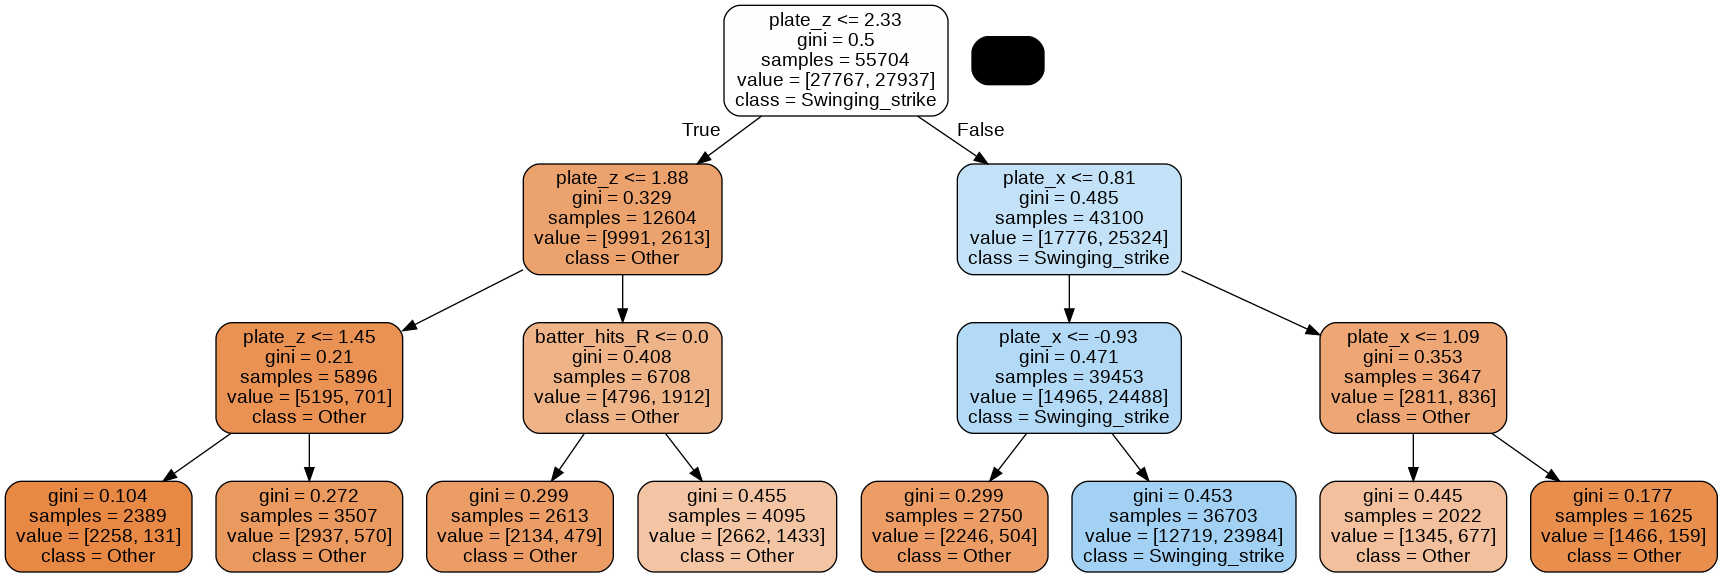

In [22]:
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(tree_model, filled=True, rounded=True, class_names=['Other', 'Swinging_strike'], feature_names=list(X.columns), out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image("/content/tree.png")

Let's see what we can observe from this basic decision tree. The first split point, as determined by the so-called "information gain" in the split, is on `plate_z`, which is the height of the pitch as it crosses home plate (in feet). Following the leftmost path, it seems that pitches below 2.32 feet are unlikely to result in swinging strikes, pitches below 1.96 ft even less likely, and pitches below 1.671 ft almost never result in swinging strikes. Our decision tree therefore feels justified in classifying observations that follow this path as `Other` (not a swinging strike). On the other hand, if the pitch is above 2.32 ft and between 0.95 ft to the left of the center of home plate (from the catcher's perspective) and 0.81 ft to the right, the classifier predicts a swinging strike. Returning to our DataFrame, let's see the distribution of outcomes for these two subsets.

In [23]:
print('Pitches with plate_z <= 1.671:\n')
fastball_df[fastball_df['plate_z'] <= 1.671]['outcome'].value_counts(normalize=True)

Pitches with plate_z <= 1.671:


0    0.97175
1    0.02825
Name: outcome, dtype: float64

In [24]:
print('Pitches with plate_z > 2.32 and plate_x > -0.95:\n')
fastball_df[(fastball_df['plate_z'] > 2.32) & (-0.95 < fastball_df['plate_x']) & (fastball_df['plate_x'] <= 0.81)]['outcome'].value_counts(normalize=True)

Pitches with plate_z > 2.32 and plate_x > -0.95:


0    0.803775
1    0.196225
Name: outcome, dtype: float64

This tells us that a pitch with the second profile is nearly seven times more likely to result in a swinging strike than a pitch with the first. So our classifier is on to something? Can we do better?

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_model = DecisionTreeClassifier(max_depth=10, random_state=3)

tree_model.fit(X_train, y_train)
print(f'Accuracy: {tree_model.score(X_test, y_test)}')

Accuracy: 0.7719373833117908


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.511226 to fit


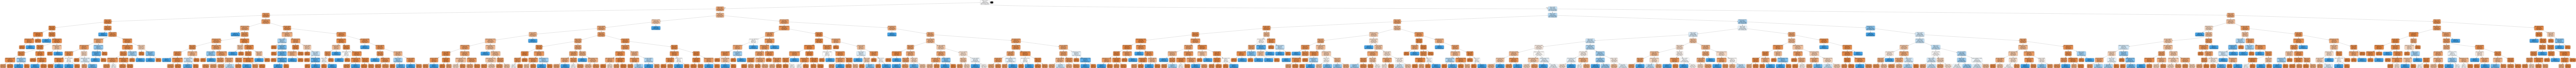

In [26]:
from IPython.display import Image

dot_data = export_graphviz(tree_model, filled=True, rounded=True, class_names=['Other', 'Swinging_strike'], feature_names=list(X.columns), out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree2.png')
Image('/content/tree2.png')

As it turns out, yes we can, but the visualization is now basically useless (unless you have an electron microscope and a lot of free time). There are just too many branch points for a human being to consider. Best to let the machine worry about the details, and take heart in its improved accuracy. Finally, let's let the classifier decide on an appropriate depth, and see if we can get a better test performance.

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_model = DecisionTreeClassifier(random_state=3)

tree_model.fit(X_train, y_train)
print(f'Depth: {tree_model.get_depth()}')
print(f'Accuracy: {tree_model.score(X_test, y_test)}')

Depth: 78
Accuracy: 0.8304610081861267


In [28]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

y_pred = tree_model.predict(X_test)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}\n')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Precision: 0.8189521254060161
Recall: 0.8431230008723466
F1 score: 0.8308618095852139

Confusion matrix:
[[5766 1282]
 [1079 5799]]


Not bad at all! Let's close the book on fastballs and move on to changeups.

# A Change of Pace

Changeups are the polar opposite of fastballs. The pitcher grips the ball more tightly, but throws with the same effort as if he was delivering a fastball. The result is an identical pitching motion, but the speed of the ball is much less than the batter has been conditioned to expect. A well-executed changeup can make a batter wish they had never been born:

<br>
<img src="https://64.media.tumblr.com/9d6e2fe69d7692fc4e727e7386597ab7/tumblr_n3qipxFh6j1ro5xweo1_400.gif">

Let's start with the same approach that we used for fastballs. We'll import and clean our changeup data, use SMOTE to oversample, and build a decision tree classifer.

In [30]:
changeup_df = pd.read_csv(SRC + 'changeups.csv')

changeup_df = changeup_df[['p_throws', 'stand', 'release_speed', 'release_spin_rate', 'spin_axis', \
                           'release_extension', 'release_pos_x', 'release_pos_z', 'plate_x', 'plate_z', \
                           'description']].rename({'p_throws': 'pitcher_throws', 'stand': 'batter_hits', \
                                                   'release_speed': 'pitch_velocity', \
                                                   'release_spin_rate': 'spin_rate', 'description': 'outcome'}, axis=1)


changeup_df.dropna(inplace=True)

changeup_df['outcome'] = np.where(changeup_df['outcome'] == 'swinging_strike', 1, 0)

one_hot_pitcher = pd.get_dummies(changeup_df['pitcher_throws'], prefix='pitcher_throws')
one_hot_batter = pd.get_dummies(changeup_df['batter_hits'], prefix='batter_hits')
newpb = pd.concat([one_hot_pitcher, one_hot_batter], axis=1)
changeup_df = pd.concat([newpb, changeup_df.drop(['pitcher_throws', 'batter_hits'], axis=1)], axis=1)

y = changeup_df['outcome'].values
X = changeup_df.drop('outcome', axis=1).values

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X = pd.DataFrame(X, columns=changeup_df.columns[:-1])
y = pd.Series(y, name='outcome')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=56)

tree_model = DecisionTreeClassifier(random_state=3)

tree_model.fit(X_train, y_train)
print(f'Depth: {tree_model.get_depth()}')
print(f'Accuracy: {tree_model.score(X_test, y_test)}')

Depth: 47
Accuracy: 0.8171620046620046


Once again, pretty good! Let's try another neat trick: random forests. Basically, we'll be generating a bunch of simple decision trees that DON'T share branching criteria (so that they all learn different features), generating predictions, and then using majority rule to output a final classification for each observation. In this way, we get a "forest" of trees that has a predictive power greater than the sum of its parts. Once again, scikit-learn to the rescue!

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=30)
rfc.fit(X_train, y_train)
print(f'Accuracy: {rfc.score(X_test, y_test)}')

Accuracy: 0.8798805361305362


That's a considerable improvement in accuracy! Where is it still messing up? Let's visualize the classifier's predictions using a confusion matrix. This is a matrix that has the number of correctly-identified non-swinging strikes (true negatives) in the upper left corner, the number of correctly-identified swinging strikes (true positives) in the bottom right, the number of incorrectly-identified swinging strikes (false negatives) in the bottom left, and the number of incorrectly-identified non-swinging strikes (false positives) in the upper right.

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(X_test)

print('Schema:')
print(np.array([['TN', 'FP'], ['FN', 'TP']]))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Schema:
[['TN' 'FP']
 ['FN' 'TP']]

Confusion matrix:
[[6133  828]
 [ 821 5946]]


Because the sum of the left column of the confusion matrix (the total number of predicted negatives) is greater than the sum of its right column, we can see this classifier is more inclined to predict that a pitch will not result in a swinging strike. We can quantify this more precisely using precision and recall. Precision is the ratio of true positives (observations that the classifier accurately identifies as positive) to total predicted positives, while recall is the ratio of true positives to the number of positive examples in the sample. If our classifier is playing duck hunt, think of precision as a measure of how many of the classifier's "shots" hit their mark, while recall is a measure of how many of the targets are actually hit. If the classifier is very patient, lines up its shot, and only fires when it is very sure that it will hit its target, it will have a high precision, but likely not a great recall. If our classifier takes a spray-and-pray approach, it will likely have a high recall, but its precision will be awful. Relating this back to identifying swinging strikes, our model seems to be placing a higher emphasis on precision than recall. Let's use scikit-learn's built-in metrics to compute these values directly, along with the associated *F*$_1$score:

$$ F_1=\frac{2\cdot\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}$$

From the above equation, we see that *F*$_1$score is the harmonic mean of precision and recall, and mashes the two metrics together into one holisitic measurement.

In [33]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}')

Precision: 0.8777679362267493
Recall: 0.878675927294222
F1 score: 0.8782216970681634


Indeed, we see that the model's precision is higher than its recall, though only slightly. We'll carry these metrics forward into our error analysis for the remaining pitch types.

# Uncle Charlie

Now is where things start to get *loopy*. Let's build a classifier that predicts SwStr% on curveballs, which are most pitchers' primary secondary offering ... it makes sense if you don't think about it. A curveball is usually thrown at about the same speed as a changeup, but the pitcher adjusts his grip so as to impart a large amount of spin on the ball as it leaves his hand. This spin is what gives the curveball its characteristic "12–6" movement. (Think dials on a clock.) One minute it's high, and the next it drops like a phone off the top loop of a roller coaster.

In [34]:
Image(url='https://thumbs.gfycat.com/NimbleShockedFurseal-size_restricted.gif')

In [35]:
Image(url='https://i.makeagif.com/media/10-22-2017/A1I7gU.gif')

Let's import, clean, one-hot encode, oversample, and create a train/test split.

In [36]:
curveball_df = pd.read_csv(SRC + 'curveballs.csv')

curveball_df = curveball_df[['p_throws', 'stand', 'release_speed', 'release_spin_rate', 'spin_axis', \
                             'release_extension', 'release_pos_x', 'release_pos_z', 'plate_x', 'plate_z', \
                             'description']].rename({'p_throws': 'pitcher_throws', 'stand': 'batter_hits', \
                                                     'release_speed': 'pitch_velocity', \
                                                     'release_spin_rate': 'spin_rate', 'description': 'outcome'}, axis=1)


curveball_df.dropna(inplace=True)

curveball_df['outcome'] = np.where(curveball_df['outcome'] == 'swinging_strike', 1, 0)

one_hot_pitcher = pd.get_dummies(curveball_df['pitcher_throws'], prefix='pitcher_throws')
one_hot_batter = pd.get_dummies(curveball_df['batter_hits'], prefix='batter_hits')
newpb = pd.concat([one_hot_pitcher, one_hot_batter], axis=1)
curveball_df = pd.concat([newpb, curveball_df.drop(['pitcher_throws', 'batter_hits'], axis=1)], axis=1)

y = curveball_df['outcome'].values
X = curveball_df.drop('outcome', axis=1).values

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X = pd.DataFrame(X, columns=curveball_df.columns[:-1])
y = pd.Series(y, name='outcome')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=56)

How can we take things to the next level? Well, there are two primary hyperparameters in a random forest classifer: the number of decision trees in the forest and the depth of each tree. It would be tedious to search through this parameter space manually, as doing so would require constructing a new random forest classifier with a different combination of hyperparameters for each trial, splitting the training data into training and validation subsets, performing error analysis, etc., before finally assessing the performance of the optimal classifier on the test data.

OR we could perform an automated grid search! Under the covers, the `GridSearchCV()` function is performing an exhaustive search over the specified parameter values for an estimator, using cross-validation accuracy (basically creating additional, temporary test sets for each trial) to sniff out the best combination of hyperparameters within the specified search space. We'll look at forest sizes between 100 and 200, iterating by 25 to explore this dimension, and tree depths between 20 and 60, iterating by 10. In the end, we'll have found a good hyperparameter combination without having to explore every possible option ourselves.

In [37]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

parameters = {'n_estimators': [100, 125, 150, 175, 200], 'max_depth': [20, 30, 40, 50, 60]}
rf_cv = GridSearchCV(estimator=rfc, param_grid=parameters, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_depth': 40, 'n_estimators': 200}


With this optimal hyperparameter combination in hand, let's train a random forest classifer, predict on the test set, and evaluate our predictions.

In [38]:
rfc = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'], max_depth=rf_cv.best_params_['max_depth'])
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Accuracy: {rfc.score(X_test, y_test)}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}\n')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9075986981746144
Precision: 0.9277305915660855
Recall: 0.8834965233432667
F1 score: 0.9050734118331153

Confusion matrix:
[[6602  485]
 [ 821 6226]]


Each additional technique adds a little bit of accuracy to our model, while sacrificing some of its explanatory power. At this point, the scale is large enough that we literally cannot see the forest for the trees. This is an acceptable tradeoff, and our next extension will make our model even more opaque.

# Slip N' Slide

Like curveballs, sliders are thrown with the intent to generate as much spin, and therefore as much movement, as possible. However, a slider's axis of rotation typically differs from that of a curveball, which gives it more side-to-side action than vertical movement.



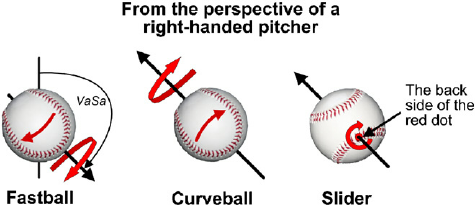

A typical slider is also thrown harder than curveball, nearly as hard as a fastball, which makes the two pitches difficult to distinguish . . . until the slider takes a hard right turn and strikes you out in the most painful way imaginable.

In [39]:
Image(url='https://cdn.barstoolsports.com/wp-content/uploads/2016/05/02/Sale1.gif')

In [40]:
Image(url='https://cdn.barstoolsports.com/wp-content/uploads/2016/05/02/Sale2.gif')

Let's perform most of the usual pipeline:

In [41]:
slider_df = pd.read_csv(SRC + 'sliders.csv')

slider_df = slider_df[['p_throws', 'stand', 'release_speed', 'release_spin_rate', 'spin_axis', \
                       'release_extension', 'release_pos_x', 'release_pos_z', 'plate_x', 'plate_z', \
                       'description']].rename({'p_throws': 'pitcher_throws', 'stand': 'batter_hits', \
                                               'release_speed': 'pitch_velocity', \
                                               'release_spin_rate': 'spin_rate', 'description': 'outcome'}, axis=1)


slider_df.dropna(inplace=True)

slider_df['outcome'] = np.where(slider_df['outcome'] == 'swinging_strike', 1, 0)

one_hot_pitcher = pd.get_dummies(slider_df['pitcher_throws'], prefix='pitcher_throws')
one_hot_batter = pd.get_dummies(slider_df['batter_hits'], prefix='batter_hits')
newpb = pd.concat([one_hot_pitcher, one_hot_batter], axis=1)
slider_df = pd.concat([newpb, slider_df.drop(['pitcher_throws', 'batter_hits'], axis=1)], axis=1)

y = slider_df['outcome'].values
X = slider_df.drop('outcome', axis=1).values

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X = pd.DataFrame(X, columns=slider_df.columns[:-1])
y = pd.Series(y, name='outcome')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=56)

For my final trick, I'll be implementing principal component analysis (PCA) to reduce the dimensionality of our dataset. Let's take a look at our DataFrame to remind us what we're working with.

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66174 entries, 0 to 66173
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pitcher_throws_L   66174 non-null  float64
 1   pitcher_throws_R   66174 non-null  float64
 2   batter_hits_L      66174 non-null  float64
 3   batter_hits_R      66174 non-null  float64
 4   pitch_velocity     66174 non-null  float64
 5   spin_rate          66174 non-null  float64
 6   spin_axis          66174 non-null  float64
 7   release_extension  66174 non-null  float64
 8   release_pos_x      66174 non-null  float64
 9   release_pos_z      66174 non-null  float64
 10  plate_x            66174 non-null  float64
 11  plate_z            66174 non-null  float64
dtypes: float64(12)
memory usage: 6.1 MB


We have 12 features in our dataset, but are they all uncorrelated? That is, are we getting the important information from just a subset of these features, and the others are redundant? Let's visualize the correlations between features using a heatmap.

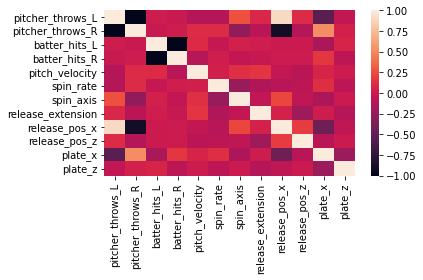

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(X.corr())
plt.tight_layout()
plt.show()

As expected, pitcher and batter handednesses are *extremely* correlated, which is drowning out the multicollinearity amongst the other variables. Let's remove these from the heatmap and rescale the color gradient to get a better idea of the intra-feature correlations.

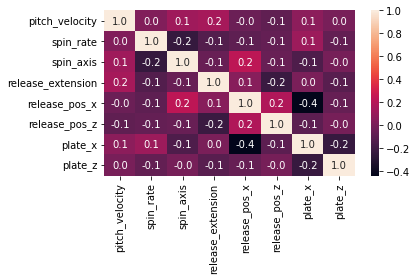

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(X.iloc[:, 4:].corr(), annot=True, fmt='.1f')
plt.tight_layout()
plt.show()

There does seem to be some multicollinearity in our data. For example, a good deal of the information conveyed by `release_pos_x` is also captured by `plate_x`. We can strip out this redundant information by performing using PCA, which projects the data onto a lower-dimensional subspace by computing the singular value decompositoin (SVD) of the corresponding correlation matrix. This is a common and powerful linear algebra technique, but the math gets a little intense. In essence, what we're doing is "reshaping" our data into a form with fewer variables that are necessarily uncorrelated. By removing the multicollinearity, we're left with a purer representation of our data that will hopefully effect an improved model. To implement PCA, we'll first need to standardize (rescale) each feature by subtracting its mean and dividing by its standard deviation:

$$x_\text{new}=\frac{x-\mu_x}{\sigma_x}\text{.}$$


Are we even surprised that scikit-learn has a function for doing this by now? Let's use it and perform PCA on the standardized data using the original number of features. We'll then generate a plot of the cumulative explained variance for each additional feature, which will help us identify the number of features that we actually need to keep in order to capture all of the variance in our data (the number of features that are actually important.)

In [45]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

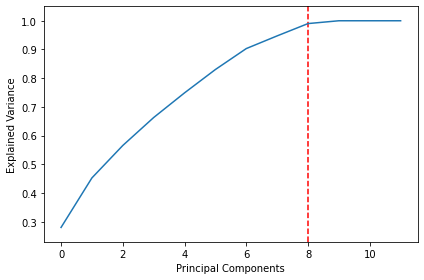


Variance explained by the first eight principal components: 0.9901779960257662


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(X.columns))
pca.fit(scaled_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.vlines(8, pca.explained_variance_ratio_[0] - 0.05, 1.05, colors='r', linestyles='dashed')
plt.ylim([pca.explained_variance_ratio_[0] - 0.05, 1.05])
plt.tight_layout()
plt.show()

print()
print(f'Variance explained by the first eight principal components: {np.cumsum(pca.explained_variance_ratio_)[8]}')

This tells us that the first eight principal components capture 99% of the variance in our data, and the remaining five are essentially just eye candy. Let's transform our 13-dimensional data onto an eight-dimensional subspace, stripping out the multicollinarity in the process.

In [47]:
pca = PCA(n_components=8)

pca_X_train = pca.fit_transform(scaled_X_train)
pca_X_test = pca.transform(scaled_X_test)

We can't really visualize the eight-dimensional transformation of the data, unfortunately. Also, the columns of our data no longer represent `pitch_velocity`, `plate_x`, `plate_z`, etc. Instead, each of our eight new features has little pieces of each of our original variables, albiet with none of the correlated parts. This will make it easier for our classifier to train, and will hopefully improve its overall accuracy.

In [48]:
rfc = RandomForestClassifier()

parameters = {'n_estimators': [100, 200, 300], 'max_depth': [20, 40, 60, 80]}
rf_cv = GridSearchCV(estimator=rfc, param_grid=parameters, scoring='accuracy', n_jobs=-1).fit(pca_X_train, y_train)

rfc = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'], max_depth=rf_cv.best_params_['max_depth']).fit(pca_X_train, y_train)

y_pred = rfc.predict(pca_X_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Accuracy: {rfc.score(pca_X_test, y_test)}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}\n')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 0.8247072157159048
Precision: 0.8321099484616586
Recall: 0.810588772250114
F1 score: 0.8212083847102343

Confusion matrix:
[[5587 1075]
 [1245 5328]]


Somewhat surprisingly, this did not offer an increase in the model's accuracy. You might say it was a . . . swing and a miss.

In [49]:
Image(url='https://ftw.usatoday.com/wp-content/uploads/sites/90/2018/01/070117_stanton_hands_hips_epdzela9.gif')

Sorry for that. Let's see if we can get better results with a different classifier. A support vector machine (SVM) is a less intuitive model than a decision tree or random forest, but it can still make for an extremely effective classifier. Given a set of $p$-dimensional data points, a support vector machine's goal in binary classification is to learn the $(p-1)$-dimensional hyperplane that best separates the data. The model then uses this separating hyperplane to predict future observations' labels. The picture below shows an idealized scenario where the data is two-dimensional, the hyperplane is one-dimensional (a line), and the data is linearly separable—that is, it is actually possible to draw a hyperplane where the two classes (shown as blue circles and red triangles) lie entirely on one side or the other.

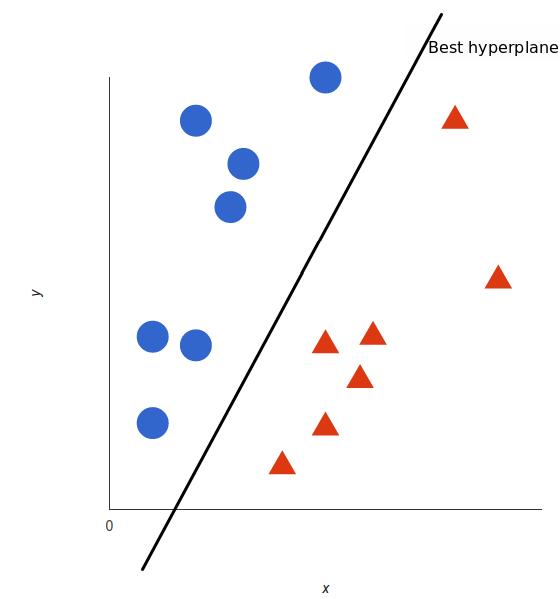

This is a very hand-wavey explanation of support vector machines, and it leaves a lot of unanswered questions regarding how they work. What does this look like in higher dimensions? How does the SVM learn the optimal hyperplane? What happens if the data is not linearly separable (that is, any plane that we draw will inevitably have a mix of circles and triangles on one side or the other)? These questions would take too much time to answer in this project, which is already starting to drag on a bit. For the moment, just think of a support vector machine as another flavor of classifier, a black box that we might use instead of a decision tree or a random forest. Let's import the model from scikit-learn and implement it on the PCA-transformed data.

In [50]:
from sklearn.svm import SVC

clf = SVC().fit(pca_X_train, y_train)

y_pred = clf.predict(pca_X_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Accuracy: {clf.score(pca_X_test, y_test)}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}\n')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7520967132602947
Precision: 0.7655695385608261
Recall: 0.7218925909021756
F1 score: 0.7430898128572547

Confusion matrix:
[[5209 1453]
 [1828 4745]]


Strike two! 

In [51]:
Image(url='https://c.tenor.com/BYca52fTxpYAAAAC/oakland-athletics-athletics.gif')

This is starting to get annoying. Is is possible that PCA doesn't actually confer any predictive accuracy?

In [52]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

y_pred = clf.predict(X_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Accuracy: {clf.score(X_test, y_test)}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}\n')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5067623724971666
Precision: 0.5043714785311832
Recall: 0.3949490339266697
F1 score: 0.44300341296928325

Confusion matrix:
[[4111 2551]
 [3977 2596]]


Never mind—at least for the SVM, using PCA offers a nearly 50% increase in overall performance. But we can do better than 75% accuracy. Let's get back to basics. In one last-ditch effort, we'll use a random forest classifier with grid search without applying PCA to the data. Standardization on its own shouldn't affect predictive accuracy, but it might decrease the time required to train the model, so we'll use the scaled version of the data.

In [53]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

parameters = {'n_estimators': [100, 200, 300], 'max_depth': [20, 40, 60, 80]}
rf_cv = GridSearchCV(estimator=rfc, param_grid=parameters, scoring='accuracy', n_jobs=-1).fit(scaled_X_train, y_train)

rfc = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'], max_depth=rf_cv.best_params_['max_depth']).fit(scaled_X_train, y_train)

y_pred = rfc.predict(scaled_X_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Accuracy: {rfc.score(scaled_X_test, y_test)}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}\n')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 0.8698904420098225
Precision: 0.9086773378264532
Recall: 0.8204777118515137
F1 score: 0.8623281100095938

Confusion matrix:
[[6120  542]
 [1180 5393]]


Based on these results, it seems that it may just be inherently more difficult to predict swing-and-miss on sliders relative to other pitch types (at least given the available features). Furthermore, while PCA does markedly improve the performance of the SVM, it actually reduces the power of the random forest slightly. In the next section, I'll summarize these results and see if there are any meaningful conclusions that can be drawn.

# Exploration of Results

The table below shows the outputs of the best-performing model that was explored for each pitch type. This should hopefully provide an outline of the impact that each additional technique had on the predictive power of the classifier. Note that for sliders, random forest with grid search performed best with standardized data, and the drop in performance from curveballs to sliders is likely reflective of the inherent difficulty of predicting SwStr% on sliders than sub-optimal modeling.

In [54]:
classifier_comps = pd.DataFrame(data={'Fastballs (Decision Tree)': [0.772, 0.820, 0.843, 0.831], \
                                      'Changeups (Random Forest)': [0.877, 0.874, 0.878, 0.876], \
                                      'Curveballs (Random Forest w/ Grid Search)': [0.903, 0.925, 0.878, 0.901], \
                                      'Sliders (Random Forest w/ Grid Search and Standardization)': [0.873, 0.912, 0.825, 0.866]}, \
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 score'])

classifier_comps

Fastballs (Decision Tree)  ...  Sliders (Random Forest w/ Grid Search and Standardization)
Accuracy                       0.772  ...                                              0.873         
Precision                      0.820  ...                                              0.912         
Recall                         0.843  ...                                              0.825         
F1 score                       0.831  ...                                              0.866         

[4 rows x 4 columns]

To compare pitch classification difficulty more directly, I used a random forest classifier along with grid search and standardization to predict swing-and-miss on the first three pitch types. The metrics are summarized below.

In [55]:
pitch_comps = pd.DataFrame(data={'Fastballs': [0.893, 0.912, 0.866, 0.889], \
                                 'Changeups': [0.889, 0.900, 0.872, 0.886], \
                                 'Curveballs': [0.902, 0.925, 0.874, 0.899], \
                                 'Sliders': [0.873, 0.912, 0.825, 0.866]}, \
                                 index=['Accuracy', 'Precision', 'Recall', 'F1 score'])

pitch_comps

Fastballs  Changeups  Curveballs  Sliders
Accuracy       0.893      0.889       0.902    0.873
Precision      0.912      0.900       0.925    0.912
Recall         0.866      0.872       0.874    0.825
F1 score       0.889      0.886       0.899    0.866

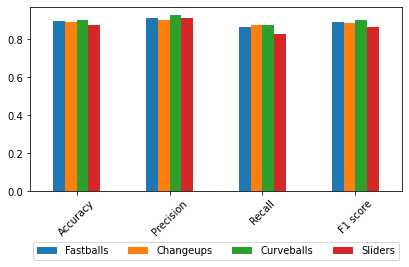

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

pitch_comps.plot.bar()
plt.xticks(rotation=45)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4)
plt.tight_layout()
plt.show()

From this, we can see where the slider classifier is going wrong. Its precision score is actually quite respectable, but it has by *far* the lowset recall of the bunch. In other words, it's letting too many swinging-strikes "slide through" undetected. A slippery pitch, indeed!

Conversely, the curveball classifier excelled across the board. Let's explore this highly-effective classifier a little further, and try to see what features it viewed as especially predictive. As I lamented earlier, we sacrificed a good deal of transparency when we upgraded from decision trees to random forests. To peak under the covers, I'll need to regenerate a single (hopefully representative) decision "stump" that only uses a few branches.

Accuracy: 0.728145069890442


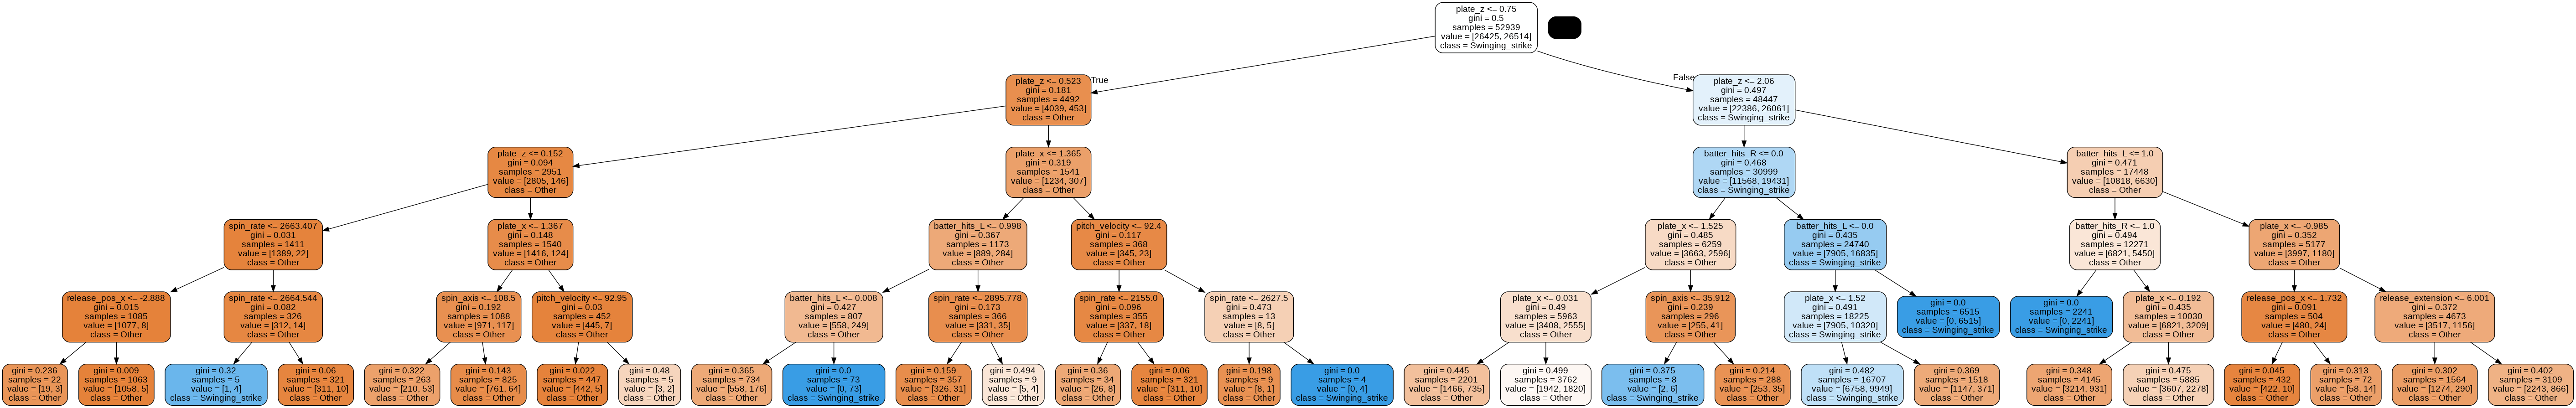

In [57]:
X = pd.DataFrame(X, columns=fastball_df.columns[:-1])
y = pd.Series(y, name='outcome')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=56)

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_model.fit(X_train, y_train)
print(f'Accuracy: {tree_model.score(X_test, y_test)}')

dot_data = export_graphviz(tree_model, filled=True, rounded=True, class_names=['Other', 'Swinging_strike'], feature_names=list(X.columns), out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree3.png')
Image("/content/tree3.png")

Sorry for the tiny text! Click on the tree to zoom in. There are a few key takeaways that I want to draw attention to. There are several branch points indicating that, unlike fastballs, curveballs that are *lower* in the zone (with a small `plate_z` value) are more likely to elicit a swing-and-miss. This makes sense based on our knowledge of the pitch's extreme vertical movement (relative to a fastball); a batter is liable to misjudge the trajectory of a curveball and swing over the top of it.

In [58]:
Image(url='https://thumbs.gfycat.com/AgreeableFixedBlesbok-size_restricted.gif')

Taking the Bayesian perspective, let's compare the distributions of `plate_z` for swinging strikes and other outcomes.

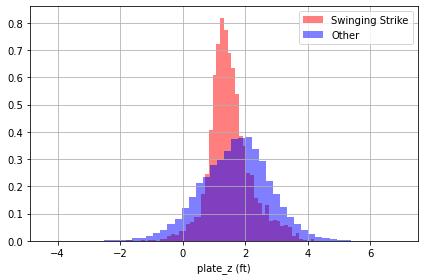

In [59]:
curve_ss = curveball_df[curveball_df['outcome']==1]
curve_o = curveball_df[curveball_df['outcome']==0]

curve_ss['plate_z'].hist(density=True, bins=50, color='red', alpha=0.5)
curve_o['plate_z'].hist(density=True, bins=50, color='blue', alpha=0.5)

plt.xlabel('plate_z (ft)')
plt.legend(['Swinging Strike', 'Other'])

plt.tight_layout()
plt.show()

As expected, the swinging strikes have a lower mean `plate_z` than other outcomes, crossing the plate at about 1.5 ft off the ground. (Negative `plate_z` values mean the pitch bounced before it got to home plate.) The standard deviation is also lower for swinging strikes—pitchers have to land their curveballs in a relatively narrow window to achieve the best results!

The other two features from the decision stump that I want to draw attention to are spin rate and spin axis. The decision tree's branching suggests that a spin rate above a certain threshold (3386.765 rpm) is predictive of a swinging strike, and the optimal spin axis is below 304.156°. Since the spin of the ball is what leads to its extreme movement, we should expect swinging strikes to have resulted from high-spin curveballs. The proceeding table of summary statistics confirms this presupposition.

In [60]:
pd.concat([curve_ss[['spin_rate']].describe().rename({'spin_rate': 'swinging_strike'}, axis=1), curve_o[['spin_rate']].describe().rename({'spin_rate': 'other'}, axis=1)], axis=1).drop('count')

swinging_strike        other
mean      2587.917058  2559.679931
std        344.825428   339.135170
min        839.000000    95.000000
25%       2357.000000  2341.000000
50%       2576.000000  2553.000000
75%       2833.000000  2793.000000
max       3574.000000  3722.000000

The effect of spin axis is slightly more nuanced. The axis of rotation will be what determines the direction the curveball breaks in. A spin axis of 0° (measured using standard angle position) should result in perfect 12–6 break, or exclusively vertical movement. Pitchers don't often achieve this ideal spin axis because their arms are attached to their sides instead of growing out of the top of their head, so let's use a two-dimensional histogram to see where they actually release them.

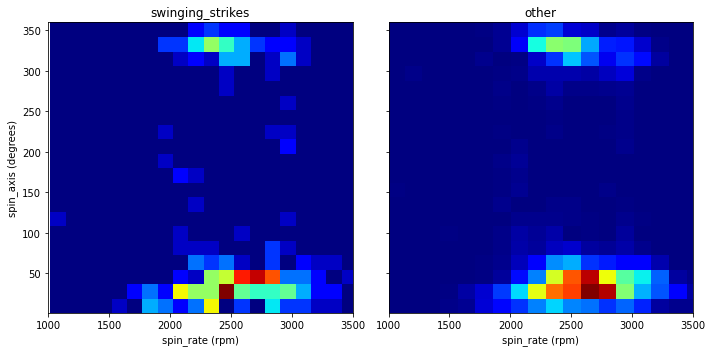

In [61]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
ax[0].hist2d(x='spin_rate', y='spin_axis', density=True, bins=(20, 20), cmap=plt.cm.jet, data=curve_ss[curve_ss['plate_z'] < 0.7])
ax[0].set_xlim(1000, 3500)
ax[0].set_xlabel('spin_rate (rpm)')
ax[0].set_ylabel('spin_axis (degrees)')
ax[0].set_title('swinging_strikes')
ax[1].hist2d(x='spin_rate', y='spin_axis', density=True, bins=(20, 20), cmap=plt.cm.jet, data=curve_o[curve_o['plate_z'] < 0.7])
ax[1].set_xlim(1000, 3500)
ax[1].set_xlabel('spin_rate (rpm)')
ax[1].set_title('other')
fig.tight_layout()
plt.show()

The clump at the bottom of each plot corresponds to right-handed pitchers, while the clumps at the tops correspond to lefties. Righties throw their curveballs with a small amount of positive "tilt", while lefties' curveballs are tilted in the opposite direction. Interestingly, the highest concentration of righties' swinging strikes occurs at a spin axis of ~50°, which is higher than that of righties' other outcomes. This suggests that (at least for right-handed hitters) a little extra *horizontal* movement on their curveballs might actually lead to the best results. There does not seem to be a similar trend for lefties, though since there are fewer left-handed pitchers (and therefore fewer left-handed curveballs thrown) it is harder to extract any obvious patterns from this histogram.

Taken altogether, curveballs should be low in the zone, spun as hard as possible, and (especially if you're right handed) given a tilt of about ~50°. Do all of this, and not only will you probably succeed as a pitcher, but the classifier we built will love you!

# Conclusion

To summarize, we explored a number of model-building techniques and classifier types to help predict SwStr% for fastballs, changeups, curveballs, and sliders. We found that curveballs were the easiest to classify, sliders the hardest, and (on the whole) the best results were achieved by a random forest that used grid search cross-validation to find the optimal set of hyperparameters and standardized data as its input. Furthermore, we were able to use the explanatory power of decision trees to take a peak at what features were given high priority by our classifier. All in all, I'd say this project was a . . .

In [62]:
Image(url='http://tireball.com/mlb/files/2014/07/gomezfail.gif')

. . . strikeout. Duh. We were exploring strikeouts. What did you think I was gonna say, a home run? Get outta here.

In [63]:
Image(url='https://c.tenor.com/MzKQUyETktcAAAAC/umpire-ejection.gif')